In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hepatitis.data', header=None)
df = df.replace('?', np.nan)
df = df.dropna(axis=1, thresh=90) # remove colums that have fewer than 90 real values
df.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
count,155.000000,155.000000,155.000000,154,155.000000,154,154,154,145,144,150,150,150,150,149,126,151,139,155.000000
unique,NaN,NaN,NaN,2,NaN,2,2,2,2,2,2,2,2,2,34,83,84,29,NaN
top,NaN,NaN,NaN,2,NaN,1,2,2,2,2,2,2,2,2,1.00,85,20,4.0,NaN
freq,NaN,NaN,NaN,78,NaN,100,93,122,120,84,120,99,130,132,29,18,7,25,NaN
mean,1.793548,41.200000,1.103226,NaN,1.845161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.451613
std,0.406070,12.565878,0.305240,NaN,0.362923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.499266
min,1.000000,7.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2.000000,32.000000,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,2.000000,39.000000,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,2.000000,50.000000,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000


1. Class: DIE, LIVE
2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
3. SEX: male, female
4. STEROID: no, yes
5. ANTIVIRALS: no, yes
6. FATIGUE: no, yes
7. MALAISE: no, yes
8. ANOREXIA: no, yes
9. LIVER BIG: no, yes
10. LIVER FIRM: no, yes
11. SPLEEN PALPABLE: no, yes
12. SPIDERS: no, yes
13. ASCITES: no, yes
14. VARICES: no, yes
15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
17. SGOT: 13, 100, 200, 300, 400, 500,
18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
20. HISTOLOGY: no, yes

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,1


In [4]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,NaN,242,3.3,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,2
154,1,43,1,2,2,1,2,2,2,2,1,1,1,2,1.20,100,19,3.1,2


Here we count the number of not-specified data in each column.

In [5]:
df.isnull().sum()

0      0
1      0
2      0
3      1
4      0
5      1
6      1
7      1
8     10
9     11
10     5
11     5
12     5
13     5
14     6
15    29
16     4
17    16
19     0
dtype: int64

In [6]:
X = df.loc[:, 1:18].values
y = df.loc[:, 0].values

We use the most frequent data in each column instead of the missing values. Because columns have discrete values and use mean may has adverse effects.

In [7]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(X)

X = imp.transform(X)

In the following diagrams, we want to see the distribution of each feature to have an insight into them.

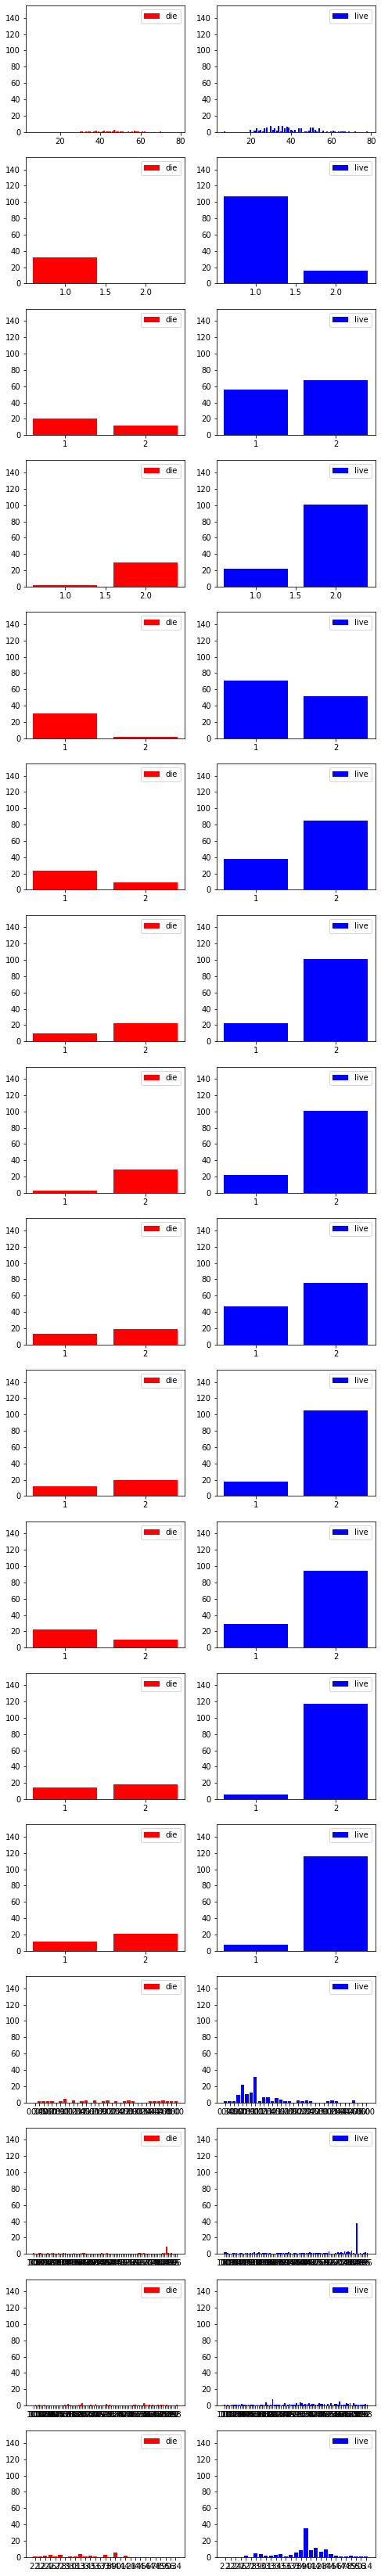

In [8]:
fig, ax = plt.subplots(X.shape[1], 2, figsize=(8, 60))

for idx in range(X.shape[1]):
    unq = np.unique(X[:, idx])
    ax[idx, 0].bar(unq, [(X[y == 1, idx] == unq).sum() for unq in unq], label='die', color='red')
    ax[idx, 0].legend()
    ax[idx, 0].set_ylim(0, 155)
    ax[idx, 1].bar(unq, [(X[y == 2, idx] == unq).sum() for unq in unq], label='live', color='blue')
    ax[idx, 1].legend()
    ax[idx, 1].set_ylim(0, 155)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

## SVC

In [11]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
print(f'accuracy on train dataset: {clf.score(X_train, y_train)}')
print(f'accuracy on test dataset: {clf.score(X_test, y_test)}')

accuracy on train dataset: 0.9514563106796117
accuracy on test dataset: 0.8076923076923077


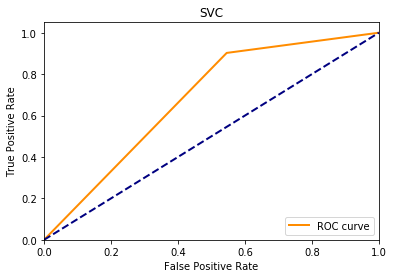

In [13]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test - 1, clf.predict(X_test) - 1)

fig, ax = plt.subplots()

lw = 2
ax.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('SVC')
ax.legend(loc="lower right")

## AdaBoostClassifier

In [14]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [15]:
print(f'accuracy on train dataset: {clf.score(X_train, y_train)}')
print(f'accuracy on test dataset: {clf.score(X_test, y_test)}')

accuracy on train dataset: 1.0
accuracy on test dataset: 0.8076923076923077


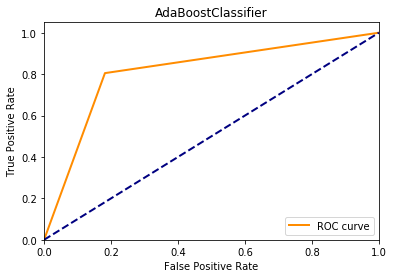

In [16]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test - 1, clf.predict(X_test) - 1)

fig, ax = plt.subplots()

lw = 2
ax.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('AdaBoostClassifier')
ax.legend(loc="lower right")

## RandomForestClassifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
print(f'accuracy on train dataset: {clf.score(X_train, y_train)}')
print(f'accuracy on test dataset: {clf.score(X_test, y_test)}')

accuracy on train dataset: 1.0
accuracy on test dataset: 0.8269230769230769


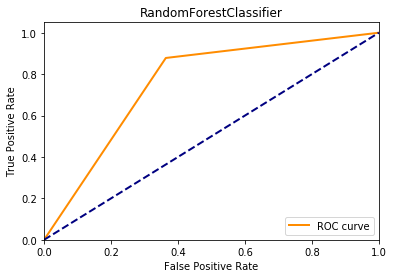

In [19]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test - 1, clf.predict(X_test) - 1)

fig, ax = plt.subplots()

lw = 2
ax.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('RandomForestClassifier')
ax.legend(loc="lower right")

## Desicion Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
print(f'accuracy on train dataset: {clf.score(X_train, y_train)}')
print(f'accuracy on test dataset: {clf.score(X_test, y_test)}')

accuracy on train dataset: 0.9805825242718447
accuracy on test dataset: 0.8076923076923077


[Text(106.95, 199.32, 'X[11] <= -1.126\ngini = 0.325\nsamples = 103\nvalue = [21, 82]'),
 Text(37.2, 163.07999999999998, 'X[0] <= -0.896\ngini = 0.355\nsamples = 13\nvalue = [10, 3]'),
 Text(18.6, 126.83999999999999, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(55.800000000000004, 126.83999999999999, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(176.70000000000002, 163.07999999999998, 'X[10] <= -0.338\ngini = 0.215\nsamples = 90\nvalue = [11, 79]'),
 Text(93.0, 126.83999999999999, 'X[8] <= -0.338\ngini = 0.413\nsamples = 24\nvalue = [7, 17]'),
 Text(37.2, 90.6, 'X[15] <= 0.827\ngini = 0.231\nsamples = 15\nvalue = [2, 13]'),
 Text(18.6, 54.359999999999985, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(55.800000000000004, 54.359999999999985, 'X[2] <= 0.029\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(37.2, 18.119999999999976, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(74.4, 18.119999999999976, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(148.8, 90.6, 'X[

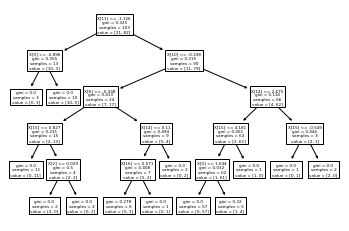

In [22]:
from sklearn.tree import plot_tree

plot_tree(clf)

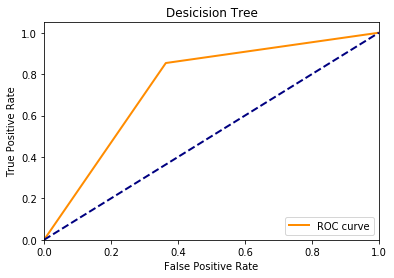

In [23]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test - 1, clf.predict(X_test) - 1)

fig, ax = plt.subplots()

lw = 2
ax.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Desicision Tree')
ax.legend(loc="lower right")